<div style="color: orange">

# Formalne metode u softverskom inženjerstvu

## Laboratorijska vježba – Optimizacioni problemi

</div>

<div style="color: orange">

### 0-1 Knapsack optimizacioni problem</div>

Neka važi:
- $n \in \mathbb{N}$ (broj objekata), 
- $v_1, v_2, \ldots, v_n \in \mathbb{R}^{\ge0}$ (vrijednosti),
- $w_1, w_2, \ldots, w_n \in \mathbb{R}^{\ge0}$ (težine) i
- $C \in \mathbb{R}^{\ge0}$ (kapacitet).

0-1 Knapsack optimizacioni problem je:
$$\underset{c_1, c_2, \ldots, c_n}{\text{maximize}} \quad {\sum_{i=1}^{n}{c_iv_i}}$$
$$\text{subject to} \quad c_1, c_2, \ldots, c_n \in \{0, 1\} \; \wedge \; \sum_{i=1}^{n}{c_iw_i} \leq C \text{.}$$

$c_1, c_2, \ldots, c_n $ možemo nazvati koeficijentima uključenja objekata.

Maksimalna ostvariva vrijednost, za fiksne vrijednosti i težine, se može formulisati kao rekurzivna funkcija,

$$
K(n, C) = 
\begin{cases} 
0 & \text{if } n = 0 \text{ or } C = 0 \\
K(n-1, C) & \text{if } w_n > C \\
\max\left(v_n + K\left(n-1, C-w_n\right), K\left(n-1, C\right)\right) & \text{inače}
\end{cases}\text{.}
$$

Funkcija nam daje maksimalnu vrijednost koju možemo ostvariti sa svih $n$ objekata i kapacitetom $C$ kao maksimum sljedećeg:
- Ako ne uključujemo $n$-ti objekat - maksimalne vrijednosti koju možemo ostvariti sa $n-1$ preostalih objekata.
- Ako uključujemo $n$-ti objekat - zbira vrijednosti $n$-tog objekta i maksimalne vrijednosti koja se može ostvariti sa $n-1$ preostalih objekata.

In [2]:
def knapsack(vs, ws, C):
    def k(i, c):
        if 0 in (i, c):
            return 0
        elif ws[i-1] > c:
            return k(i-1, c)
        else:
            return max(k(i-1, c), k(i-1, c-ws[i-1]) + vs[i-1])
    return k(len(vs), C)

Izmjerićemo vrijeme izvršavanja u zavisnosti od broja objekata, kao veličine ulaza, u najgorem slučaju.

         n  |       t
         1        0ms
         2        0ms
         3        0ms
         4        0ms
         5        0ms
         6        0ms
         7        0ms
         8        0ms
         9        0ms
        10        1ms
        11        1ms
        12        2ms
        13        5ms
        14       10ms
        15       17ms
        16       60ms
        17       73ms
        18      133ms
        19      272ms
        20      556ms
        21     1119ms
        22     1689ms
        23     3008ms
        24     6102ms
        25    11951ms


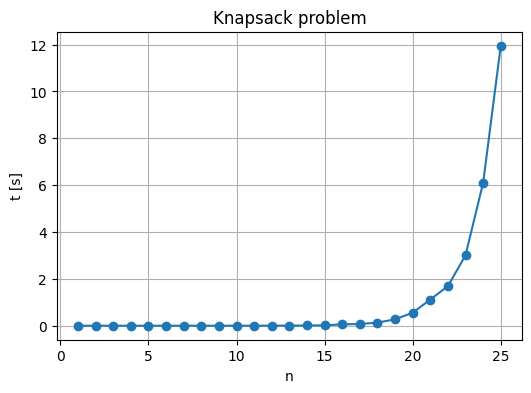

In [3]:
import time
ns = range(1, 26)
ts = []
print('         n  |       t')
for n in ns:
    vs = [1 for _ in range(n)]
    ws = [1 for _ in range(n)]
    C = sum(ws) # worst case
    t0 = time.time()
    knapsack(vs, ws, C)
    ts.append(time.time() - t0)
    print(f'{n:10d}   {ts[-1]*1000:6.0f}ms')

# Plot
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(ns, ts, 'o-')
plt.xlabel('n')
plt.ylabel('t [s]')
plt.title('Knapsack problem')
plt.grid()
plt.show()

<div style="color: orange">

### 0-1 Knapsack algoritam optimizovan tehnikom dinamičkog programiranja</div>

Realizovati ćemo Python algoritam za pronalaženje maksimalne ostvarive vrijednosti, za 0-1 Knapsack problem, koji je optimizovan upotrebom tehnika dinamičkog programiranja.

Ponovimo rekurzivnu formulu za izračunavanje maksimalne ukupne vrijednosti:

$$
K(n, C) = 
\begin{cases} 
0 & \text{if } n = 0 \text{ or } C = 0 \\
K(n-1, C) & \text{if } w_n > C \\
\max\left(v_n + K\left(n-1, C-w_n\right), K\left(n-1, C\right)\right) & \text{inače}
\end{cases}\text{.}
$$

Iz formule uočavamo da bismo mogli ubrzati izračunavanje za $K(n,C)$ ukoliko već imamo izračunato $K(n-1, C)$ i $K(n-1, C-w_n)$. Ideja se onda svodi na to da unaprijed izračunamo maksimalne ukupne vrijednosti kolekcija za prvih $1,2,3,\ldots$ objekata, za sve vrijednosti kapaciteta od $C$ do $0$. Onda će važiti da uvijek imamo već izračunato $K(i-1, c)$ i $K(i-1, C-w_i)$, te da nije potrebno vršiti rekurzivni poziv.

In [4]:
def knapsack_dp(vs, ws, C):
    k = [0] * (C+1)
    for i in range(0, len(vs)): # Na početku i-te iteracije k je [K(i,0), K(i,1), ..., K(i,C)]
        for c in range(C, 0, -1): 
            if ws[i] > c:
                continue
            k[c] = max(k[c] , k[c-ws[i]] + vs[i]) # k[c] postaje K(i+1,c)
    return k[C] # K(n, C)

         n  |       t
         1        0ms
      1001      351ms
      2001     1179ms
      3001     2225ms
      4001     3268ms


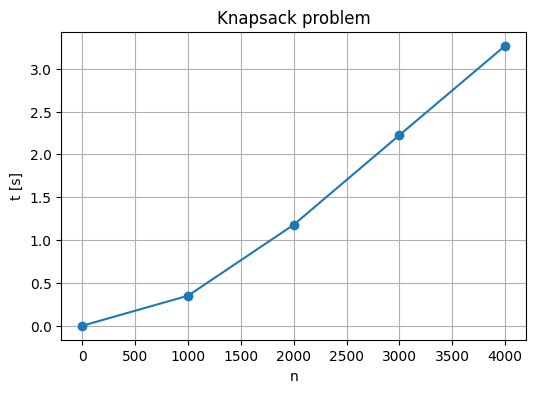

In [6]:
import time
ns = range(1, 5000, 1000)
ts = []
print('         n  |       t')
for n in ns:
    vs = [1 for _ in range(n)]
    ws = [1 for _ in range(n)]
    C = sum(ws) # worst case
    t0 = time.time()
    knapsack_dp(vs, ws, C)
    ts.append(time.time() - t0)
    print(f'{n:10d}   {ts[-1]*1000:6.0f}ms')

# Plot
from matplotlib import pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(ns, ts, 'o-')
plt.xlabel('n')
plt.ylabel('t [s]')
plt.title('Knapsack problem')
plt.grid()
plt.show()

U najgorem slučaju, naivno rekurzivno rješenje je u $\Theta(2^n)$. Ovo proističe iz toga što se pretražuje svaki podskup stavki kako bi se našao onaj koji maksimizira vrijednost bez prevazilaženja kapaciteta težine.

Rješenje zasnovano na dinamičkom programiranju ima pseudopolinomijalnu vremensku kompleksnost, $\Theta(nC)$, gdje je $n$ broj stavki, a $C$ kapacitet ranca. Poboljšana efikasnost proizilazi iz toga što je izbjegnuto ponovno izračunavanje potproblema, što je nedostatak naivnog pristupa.

Zadatak za vježbu. Modifikovati implementirani optimizovani algoritam, tako da, pored maksimalne ostvarive vrijednosti, vraća i koeficijente uključenja objekata $c_1, c_2, \ldots, c_n$.

<div style="color: orange">

### Gradijentni spust </div>

Zadatak. Dobijena su sljedeća mjerenja $t$ za ulaze $n$ i $m$.

| $n$ | $m$ | $t$     |
| -   | -   | -       |
| 100 | 100 | 600000  |
| 100 | 200 | 1700000 |
| 200 | 100 | 1100000 |

Data je familija matematičkih modela za $t$, $$f(n,m) = K_1n^2 + K_2nm + K_3m^2\text{.}$$ Pomoću tehnike gradijentnog spusta odrediti parametre $K_1$, $K_2$ i $K_3$ i time odabrati adekvatan model iz navedene familije.

Ovo ćemo posmatrati ovo kao optimizacioni problem minimizacije greške matematičkog modela u odnosu na stvarna mjerenja. Potrebno je prvo odabrati adekvatnu funkciju greške (gubitka - loss). Neka je $C=3$ broj mjerenja. Možemo koristiti srednjekvadratnu grešku (mean squared error, MSE): 

$$L(K_1, K_2, K_3)= \frac{1}{C}\sum_{i=1}^C(f(n_i, m_i) - t_i)^2$$

$$\frac{\partial L(K_1, K_2, K_3)}{\partial K_j}
= \frac{1}{C}\sum_{i=1}^C\frac{\partial \left((f(n_i, m_i) - t_i)^2\right)}{\partial K_j}
= \frac{1}{C}\sum_{i=1}^C\frac{\partial \left((f(n_i, m_i) - t_i)^2\right)}{\partial f(n_i, m_i)}\frac{\partial f(n_i, m_i)}{\partial K_j}$$
$$ = \frac{2}{C}\sum_{i=1}^C{\left(f(n_i, m_i) - t_i\right)}\frac{\partial f(n_i, m_i)}{\partial K_j}$$

$$\frac{\partial L}{\partial K_1} = \frac{2}{C}\sum_{i=1}^C{(f(n_i, m_i) - t_i)n_i^2}$$
$$\frac{\partial L}{\partial K_2} = \frac{2}{C}\sum_{i=1}^C{(f(n_i, m_i) - t_i)n_im_i}$$
$$\frac{\partial L}{\partial K_3} = \frac{2}{C}\sum_{i=1}^C{(f(n_i, m_i) - t_i)m_i^2}$$



In [24]:
import numpy as np

# Data points
n = np.array([   100,     100,     200])
m = np.array([   100,     200,     100])
t = np.array([600000, 1700000, 1100000])

# Initialize coefficients
Ks = np.array([1.0, 1.0, 1.0])

step_size = 5e-10 # TODO Need small value due to large magnitudes in the data. Pick better value to minimize loss.
num_iterations = 10000

def f(n, m):
    return Ks[0] * n**2 + Ks[1] * n * m + Ks[2] * m**2

# Gradient descent loop
for i in range(num_iterations):
    # Compute current predictions
    errors = f(n, m) - t

    # Compute gradients
    grad_K1 = (2/len(n)) * np.sum(errors * (n**2))
    grad_K2 = (2/len(n)) * np.sum(errors * (n * m))
    grad_K3 = (2/len(n)) * np.sum(errors * (m**2))
    grad_Ks = np.array([grad_K1, grad_K2, grad_K3])
    
    # Update the parameters
    Ks = Ks - step_size * grad_Ks
    
    # Print progress
    if i % 1000 == 0:
        loss = np.mean((f(n, m) - t)**2) # Mean Squared Error
        print(f"Iteration {i}: Loss = {loss:.2f}, K1 = {Ks[0]:.4f}, K2 = {Ks[1]:.4f}, K3 = {Ks[2]:.4f}")

print("\nFinal coefficients:")
print(f"K1 = {Ks[0]}")
print(f"K2 = {Ks[1]}")
print(f"K3 = {Ks[2]}")

Iteration 0: Loss = 80434703703.70, K1 = 22.0667, K2 = 20.6333, K3 = 28.0667
Iteration 1000: Loss = 1333274.76, K1 = 10.4238, K2 = 18.9609, K3 = 30.4238
Iteration 2000: Loss = 208773.78, K1 = 10.1677, K2 = 19.5888, K3 = 30.1677
Iteration 3000: Loss = 32691.30, K1 = 10.0664, K2 = 19.8373, K3 = 30.0664
Iteration 4000: Loss = 5119.04, K1 = 10.0263, K2 = 19.9356, K3 = 30.0263
Iteration 5000: Loss = 801.58, K1 = 10.0104, K2 = 19.9745, K3 = 30.0104
Iteration 6000: Loss = 125.52, K1 = 10.0041, K2 = 19.9899, K3 = 30.0041
Iteration 7000: Loss = 19.65, K1 = 10.0016, K2 = 19.9960, K3 = 30.0016
Iteration 8000: Loss = 3.08, K1 = 10.0006, K2 = 19.9984, K3 = 30.0006
Iteration 9000: Loss = 0.48, K1 = 10.0003, K2 = 19.9994, K3 = 30.0003

Final coefficients:
K1 = 10.000100908736716
K2 = 19.999752569935936
K3 = 30.000100908736716


Zadatak za vježbu. Modifikovati prethodni kod tako da se automatski probaju različite vrijednosti sa `step_size` sa fiksnim brojem iteracija, te da se odabere onaj `step_size` s kojim se pronalazi najbolji rezultat.